# Grover's Algorithm

Grover’s Algorithm is a quantum search algorithm that can search for a value or element in an unsorted set in O(√N) as opposed to classical search algorithms that at worse will find an element in O(N) time. 

Note that this implementation is single iteration only. However the code is run with 100 shots to show the frequency of values measured. 

The algorithm is divided in to the following steps: 

1. Put all Qubits in to superposition using a Hadamard gate. 

2. Implement an oracle that will mark the state you wish to find. This oracle works by performing a phase flip inverts the states amplitude. 

3. Implement an amplification circuit that further increases the marked states amplitude while decreasing the amplitude of all other states

4. Measure all qubits 

This Jupyter Notebook demonstrates **Grover's Search Algorithm** — a quantum algorithm for searching an unsorted database faster than any classical method.

You will see:
- How to build an oracle that marks a target state
- How to apply Grover's diffusion operator
- How to run the search circuit
- How to visualize the result

### Imports

In [ ]:
# 📚 Import Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Circuit Formation

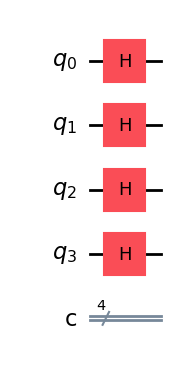

In [2]:
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')

qc = QuantumCircuit(q,c)
# Put all Qubits in to superposition using a Hadamard gate.
qc.h(q)

qc.draw("mpl")

### build an oracle

In [3]:
qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])


# example oracle code for 0000

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

### Amplification of circuit

In [4]:
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measure the circuit

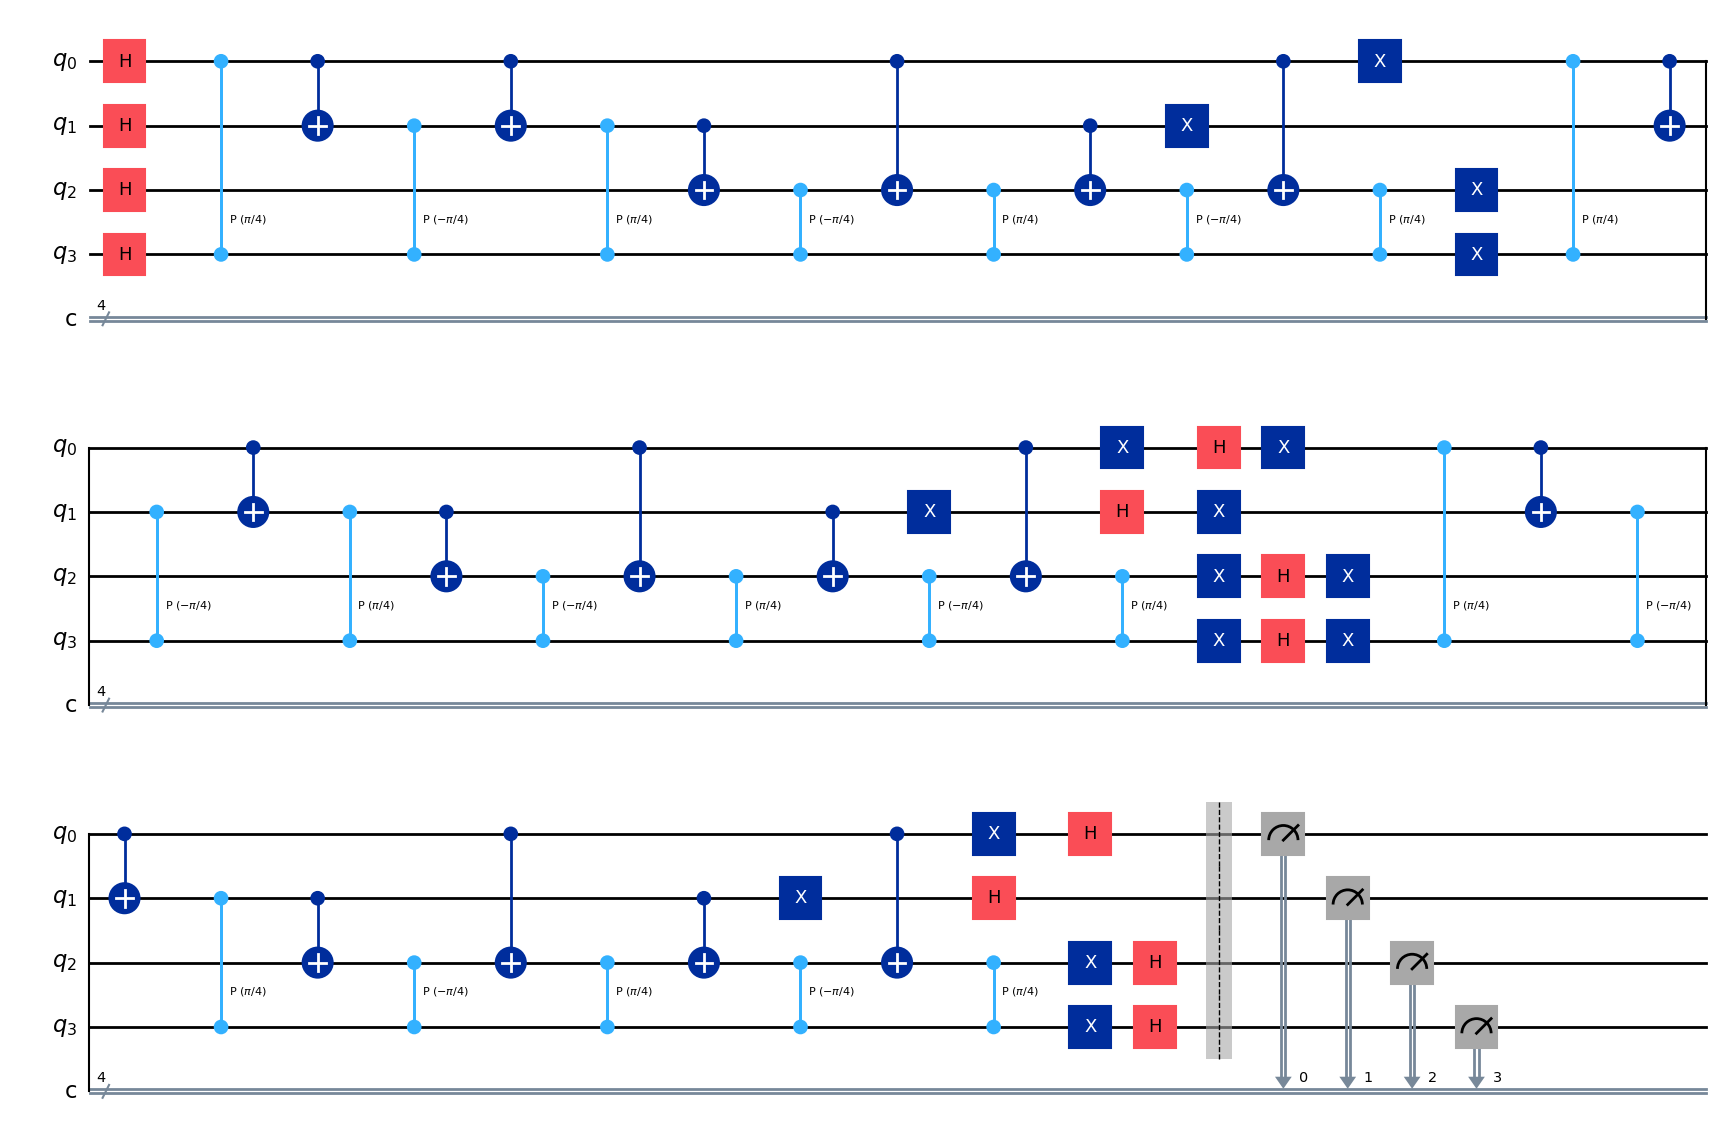

In [5]:
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

qc.draw("mpl")

{'1000': 3, '0000': 45, '1111': 40, '1100': 1, '0011': 1, '0010': 4, '1101': 2, '0111': 1, '1001': 1, '1010': 1, '1011': 1}


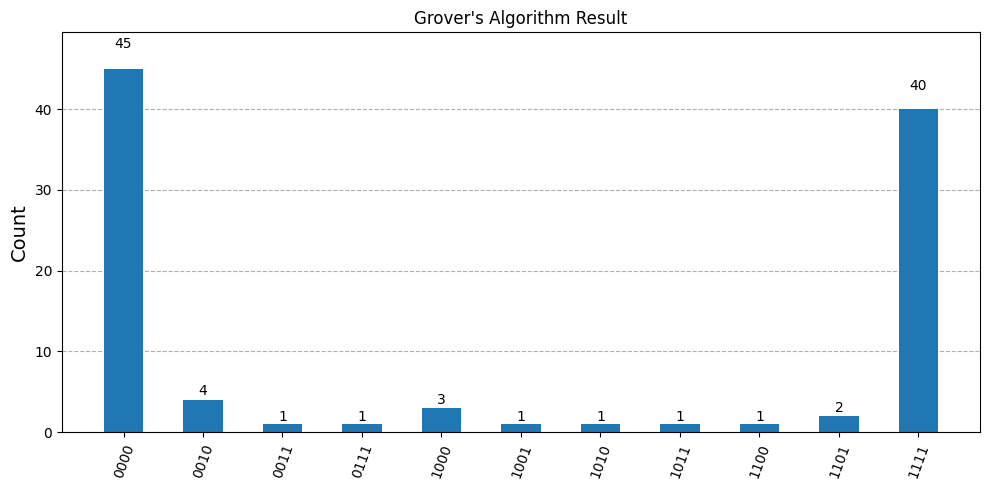

In [28]:
job = AerSimulator().run(qc , shots = 100)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts, title="Grover's Algorithm Result", figsize=(10, 5))

### ✅ Conclusion

- We built **Grover’s Search Algorithm** with Qiskit.
- We constructed an oracle and a diffuser to find the marked item.
- The measurement results show the target state appears with the highest probability.
- This demonstrates how quantum algorithms can offer real speedup over classical brute force search.

---

**Made with ❤️ using Qiskit**